In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import nltk

import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/saptarshipal/DATA/sms_spam_classification/data/spam.csv',encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df1 = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df1.shape

(5572, 2)

In [7]:
df1.columns

Index(['v1', 'v2'], dtype='object')

## Data Cleaning

In [8]:
df1.rename(columns = {'v1':'target','v2':'text'},inplace=True)
df1.columns

Index(['target', 'text'], dtype='object')

In [9]:
df1.target.unique()

array(['ham', 'spam'], dtype=object)

In [10]:
encoder = LabelEncoder()

df1['target'] = encoder.fit_transform(df1['target'])
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df1.duplicated().sum()

403

In [13]:
df1 = df1.drop_duplicates(keep='first')
df1.shape

(5169, 2)

## EDA

In [14]:
df1['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

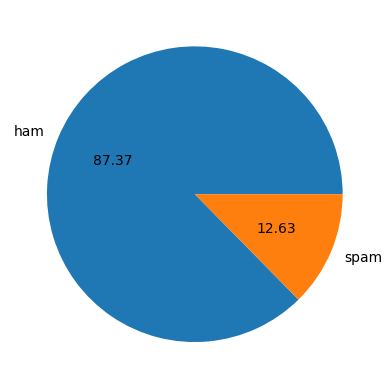

In [15]:
plt.pie(df1['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saptarshipal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df1['num_characters']=df1['text'].apply(len)

In [18]:
df1['num_words']=df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df1.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df1.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df1[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#ham

df1[df1['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam

df1[df1['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


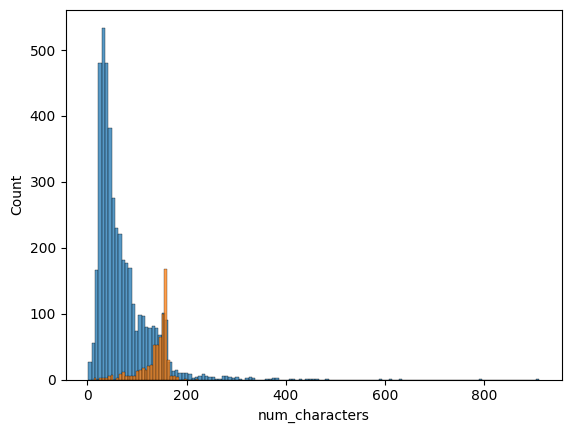

In [25]:
sns.histplot(df1[df1['target']==0]['num_characters'])
sns.histplot(df1[df1['target']==1]['num_characters'])
plt.show()

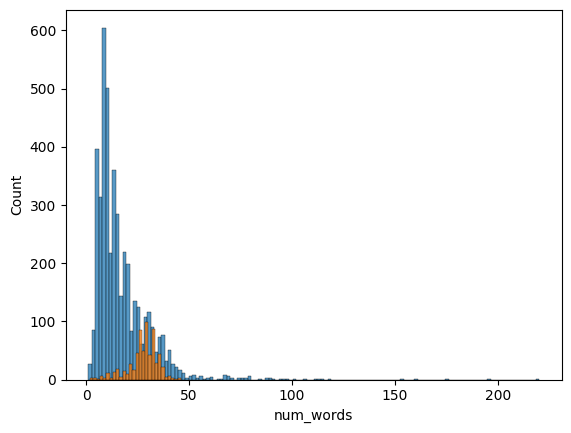

In [26]:
sns.histplot(df1[df1['target']==0]['num_words'])
sns.histplot(df1[df1['target']==1]['num_words'])
plt.show()

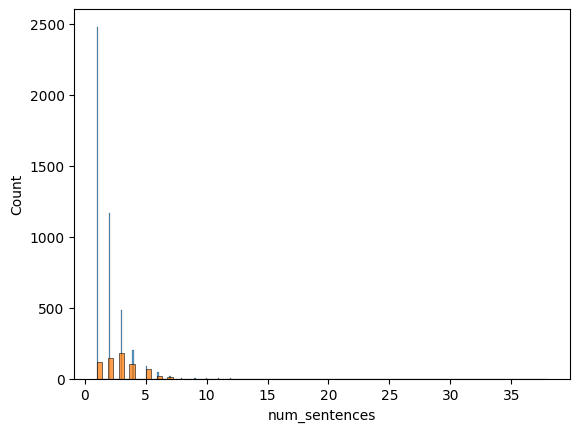

In [27]:
sns.histplot(df1[df1['target']==0]['num_sentences'])
sns.histplot(df1[df1['target']==1]['num_sentences'])
plt.show()

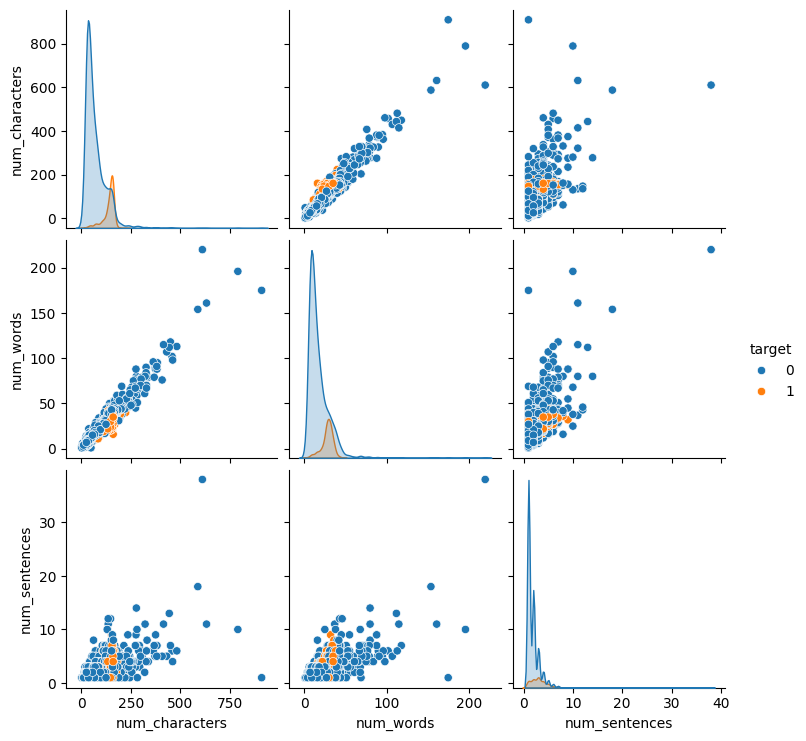

In [28]:
sns.pairplot(df1,hue='target')
plt.show()

<Axes: >

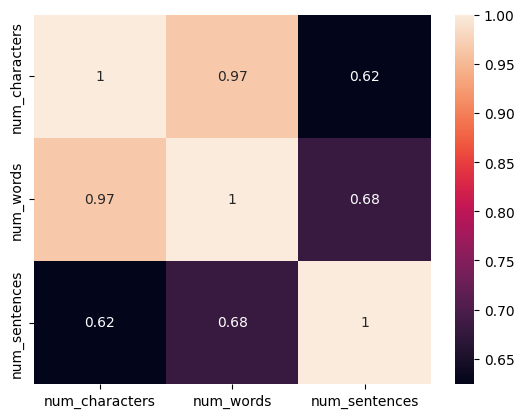

In [29]:
sns.heatmap(df1[['num_characters','num_words','num_sentences']].corr(),annot=True)